In [78]:
from scipy.ndimage import median_filter,minimum_filter,maximum_filter
import numpy as np
import  matplotlib.pyplot as plt

In [79]:
img = "llvm_output/render_samples_1024_depth_8.png"
og = plt.imread(img)

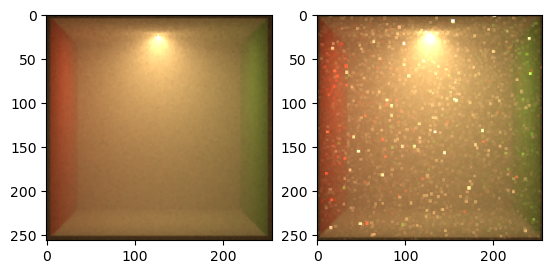

In [80]:
low = np.zeros(og.shape)
high = np.zeros(og.shape)
mid = np.zeros(og.shape)
low[:,:,0] = minimum_filter(og[:,:,0],footprint=np.ones((3,3)))
low[:,:,1] = minimum_filter(og[:,:,1],footprint=np.ones((3,3)))
low[:,:,2] = minimum_filter(og[:,:,2],footprint=np.ones((3,3)))

high[:,:,0] = maximum_filter(og[:,:,0],footprint=np.ones((3,3)))
high[:,:,1] = maximum_filter(og[:,:,1],footprint=np.ones((3,3)))
high[:,:,2] = maximum_filter(og[:,:,2],footprint=np.ones((3,3)))

mid[:,:,0] = median_filter(og[:,:,0],footprint=np.ones((3,3)))
mid[:,:,1] = median_filter(og[:,:,1],footprint=np.ones((3,3)))
mid[:,:,2] = median_filter(og[:,:,2],footprint=np.ones((3,3)))

# im[:,:,0] = laplace(og[:,:,0])
# im[:,:,1] = laplace(og[:,:,1])
# im[:,:,2] = laplace(og[:,:,2])
plt.subplot(1,2,1)
plt.imshow(low)
plt.subplot(1,2,2)
plt.imshow(high)

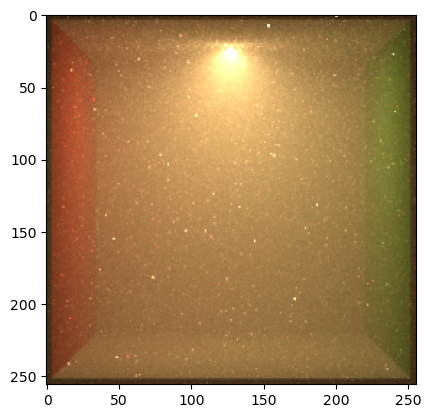

In [81]:
plt.imshow(og)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.019607841968536377..1.0].


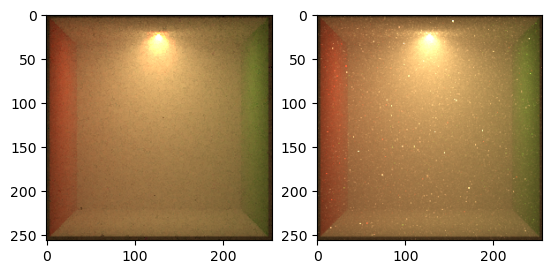

In [ ]:

a = 0.3
diff = (high - low) / 2
diff[:,:,0] = minimum_filter(diff[:,:,0],footprint=np.ones((3,3)))
diff[:,:,1] = minimum_filter(diff[:,:,1],footprint=np.ones((3,3)))
diff[:,:,2] = minimum_filter(diff[:,:,2],footprint=np.ones((3,3)))
denoised = og - diff

blend = (denoised + mid*(1-a)) / 2
plt.subplot(1,2,1)
plt.imshow(denoised)
plt.subplot(1,2,2)
plt.imshow(og)